In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [80]:
trainCopy = train.copy()
trainCopy['Sex'] = trainCopy['Sex'].map({'female': 1, 'male': 0})
trainCopy['Embarked'] = trainCopy['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
trainCopy['Embarked'].fillna(99, inplace=True)
trainCopy['Embarked'].isnull().values.any()

False

In [81]:
trainCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [82]:
trainNoNan = trainCopy[['Survived','Pclass','Sex','Parch','Fare','Age', 'Embarked']]
trainNoNan = trainCopy[trainCopy['Age'].notnull()]
trainNan = trainCopy[trainCopy['Age'].isnull()]

In [87]:
# 10-fold cross-validation with Three features for Age
lm = LinearRegression()
X = trainNoNan[['Survived','Pclass','Parch','Fare']]
y = trainNoNan['Age']
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

12.962308421219642


In [88]:
ageX = trainNoNan[['Survived','Pclass','Parch','Fare']]
ageY = trainNoNan['Age']
ageTest = trainNan[['Survived','Pclass','Parch','Fare']]

In [89]:
X = ageX.to_numpy()
y = ageY.to_numpy()
test = ageTest.to_numpy()
X = np.around(X).astype(int)
y = np.around(y).astype(int)
test = np.around(test).astype(int)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(test)

In [94]:
# search for an optimal value of K for KNN
k_range = list(range(1, 101))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

[0.04479976157394951, 0.04608857704497795, 0.044471258951717524, 0.049624348227613815, 0.04419672646665872, 0.043151570842555734, 0.0473427028033594, 0.04670642550041543, 0.04769679005444161, 0.044961864251598496, 0.04572865570485859, 0.044032549342085565, 0.04492566688206779, 0.04630982661936284, 0.035051761150771056, 0.03343509572482996, 0.03899838428811852, 0.03248548254488848, 0.032376680455888374, 0.032515217682144895, 0.03643576444028068, 0.034699500704016936, 0.033192179617748487, 0.028045805173128435, 0.03536296849029175, 0.03208091720824047, 0.033110518237841495, 0.030388115495636782, 0.03535498712917508, 0.034003635777823726, 0.03409181919934048, 0.0384414068822615, 0.03668702091734921, 0.03501365370012235, 0.03929093097739962, 0.03790346658993524, 0.0391646508511195, 0.038707860727662705, 0.038772033811637775, 0.038772033811637775, 0.03581804783784982, 0.03979710071389766, 0.038562532812663086, 0.038671334901663204, 0.03958477948177445, 0.04887792552930646, 0.048600648252029

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Text(0, 0.5, 'Cross-Validated Accuracy')

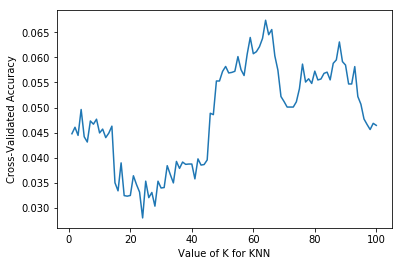

In [95]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

In [ ]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

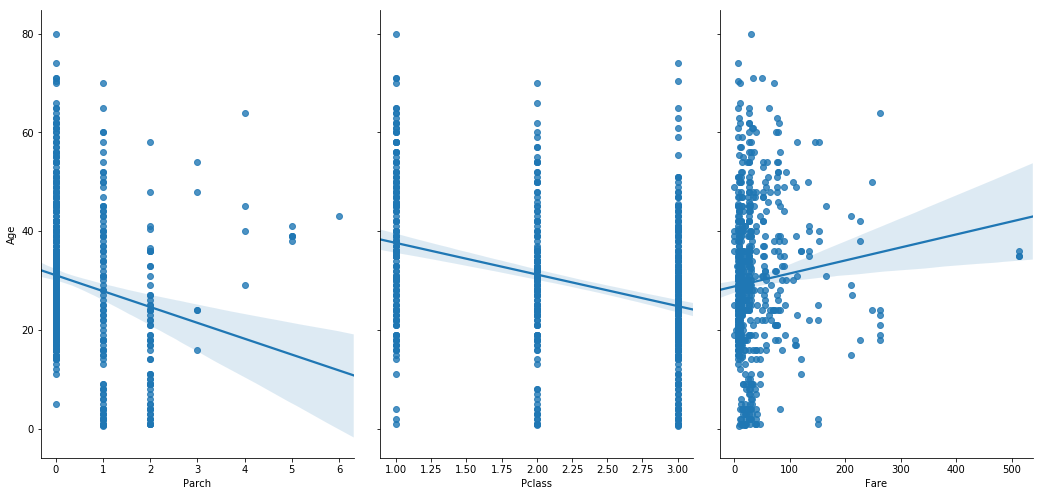

In [31]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(trainNoNan, x_vars=['Parch','Pclass','Fare'], y_vars='Age', size=7, aspect=0.7, kind='reg')

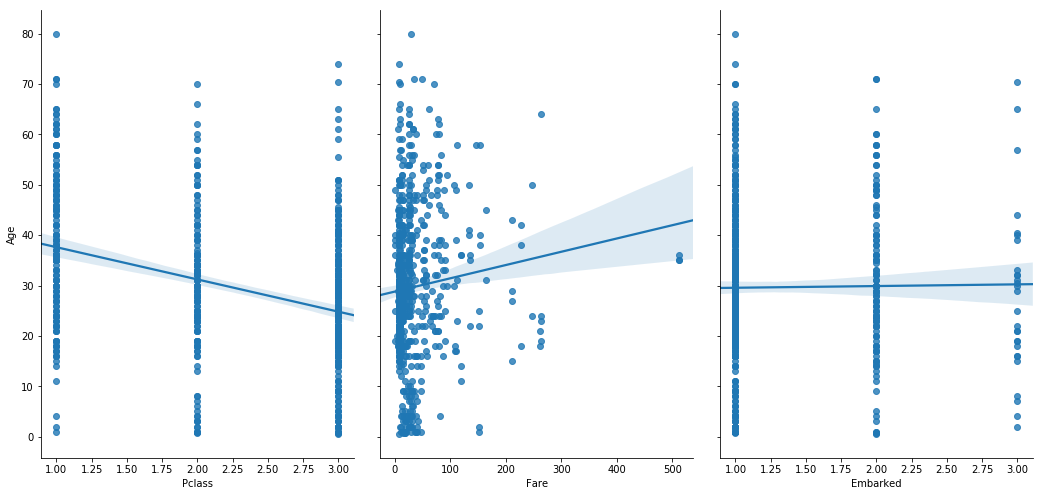

In [30]:
sns.pairplot(trainCopy, x_vars=['Pclass','Fare','Embarked'], y_vars='Age', size=7, aspect=0.7, kind='reg')

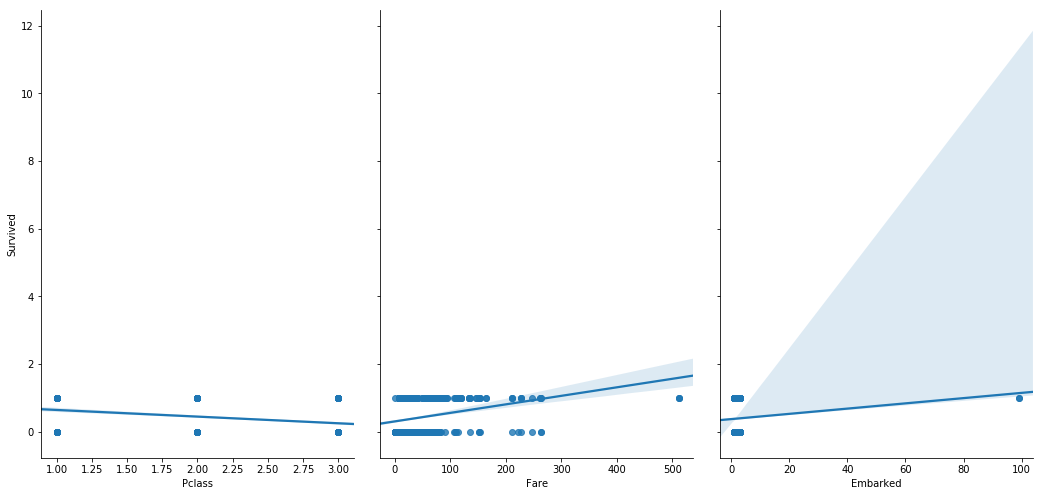

In [16]:
sns.pairplot(trainCopy, x_vars=['Pclass','Fare','Embarked'], y_vars='Survived', size=7, aspect=0.7, kind='reg')